In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [132]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [133]:
# import data
raw_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')

# Perform descriptive analysis and EDA

In [134]:
raw_data.head()
raw_data.describe()
raw_data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
# seperate numerical and categorical columns
target_cols = ['Survived']
num_cols = list(set(raw_data._get_numeric_data().columns) - set(target_cols))
cat_cols = list(set(raw_data.columns) - set(num_cols) - set(target_cols))

num_features = raw_data[num_cols]
cat_features = raw_data[cat_cols]

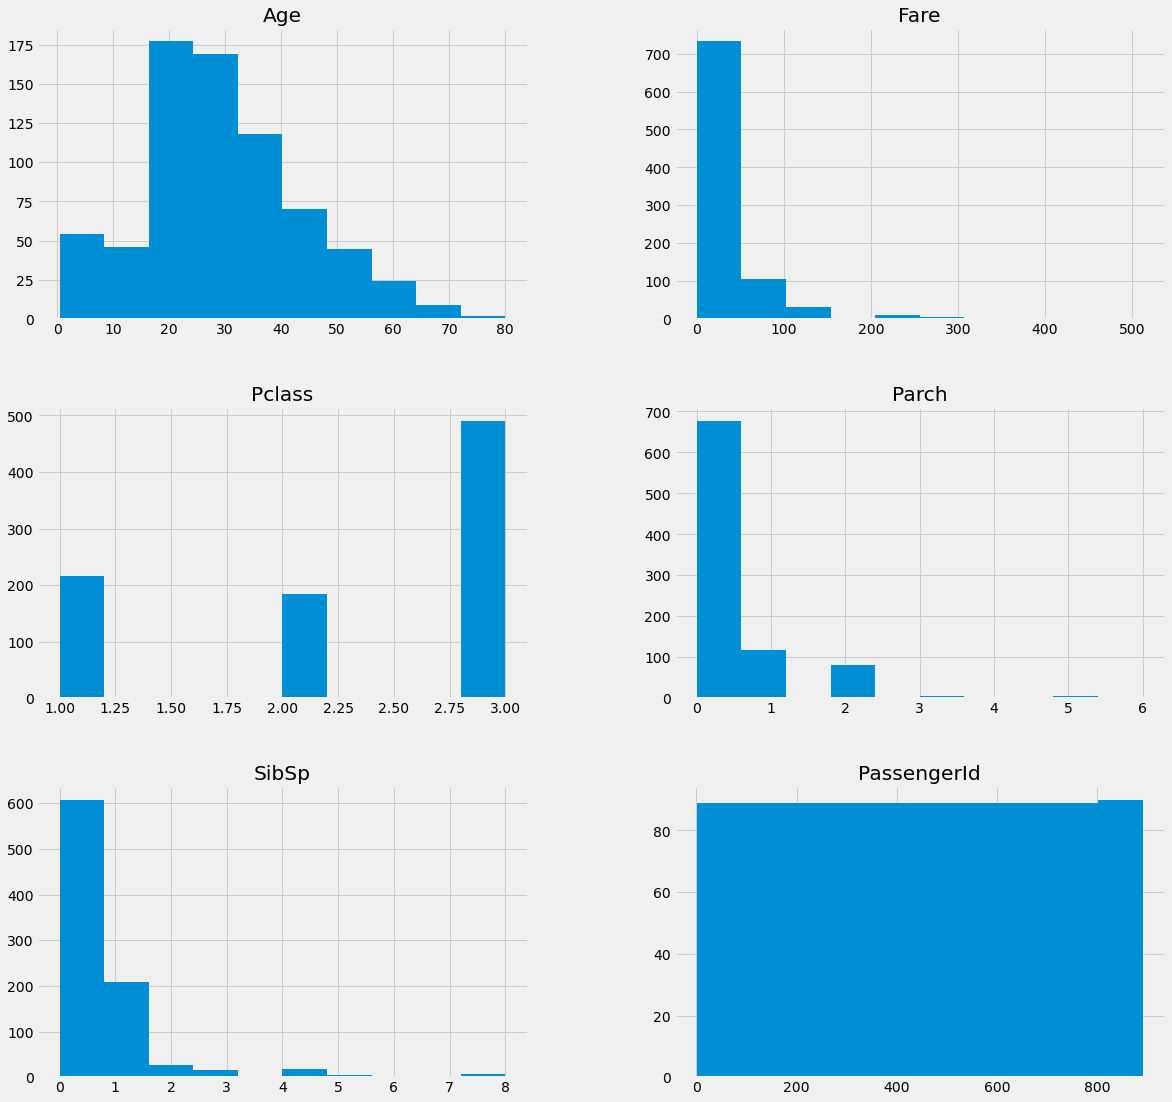

In [136]:
num_features.hist(figsize=(18,18));

# Sort Categorical Columns

In [137]:
cat_features.head()

,Embarked,Name,Sex,Ticket,Cabin
0,S,"Braund, Mr. Owen Harris",male,A/5 21171,NaN
1,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85
2,S,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN
3,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123
4,S,"Allen, Mr. William Henry",male,373450,NaN


In [138]:
# looking at histogram, some numerical variables should be treated as categorical
num_to_cat = ['Pclass']

cat_features['Pclass'] = raw_data[num_to_cat]
num_features.drop(num_to_cat, axis=1, inplace=True)

# num_features.shape
# cat_features.shape

In [139]:
# drop variables not helpful
# categorical
cat_cols_to_drop = ['Ticket','Name','Cabin']
cat_features.drop(cat_cols_to_drop, axis=1, inplace=True)
cat_features.head()

# numerical
num_cols_to_drop = ['PassengerId']
num_features.drop(num_cols_to_drop, axis=1, inplace=True)
num_features.head()

,Embarked,Sex,Pclass
0,S,male,3
1,C,female,1
2,S,female,3
3,S,female,1
4,S,male,3


,Age,Fare,Parch,SibSp
0,22.0,7.2500,0,1
1,38.0,71.2833,0,1
2,26.0,7.9250,0,0
3,35.0,53.1000,0,1
4,35.0,8.0500,0,0


In [140]:
# look at value counts for cat variables
cat_features['Embarked'].value_counts()
cat_features['Pclass'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [141]:
# one-hot encoding for cat variables
cat_OH = cat_features[['Sex', 'Embarked', 'Pclass']]
cat_features_OH = pd.get_dummies(data=cat_OH, columns = ['Sex', 'Embarked', 'Pclass'], prefix = ['Sex', 'Embarked', 'Pclass'])

In [142]:
cat_features_OH.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1


In [143]:
# prep numerical features
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
normalized = transformer.fit_transform(num_features.loc[:,num_features.columns])
norm_num_df = pd.DataFrame(normalized, columns=num_features.columns)

In [144]:
norm_num_df

,Age,Fare,Parch,SibSp
0,-0.530377,-0.502445,-0.473674,0.432793
1,0.571831,0.786845,-0.473674,0.432793
2,-0.254825,-0.488854,-0.473674,-0.474545
3,0.365167,0.420730,-0.473674,0.432793
4,0.365167,-0.486337,-0.473674,-0.474545
...,...,...,...,...
886,-0.185937,-0.386671,-0.473674,-0.474545
887,-0.737041,-0.044381,-0.473674,-0.474545
888,NaN,-0.176263,2.008933,0.432793
889,-0.254825,-0.044381,-0.473674,-0.474545


In [145]:
# merge all data

model_df = norm_num_df.merge(cat_features_OH, how = 'outer', left_index = True, right_index = True)
model_df['Survived'] = raw_data['Survived']
print("Shape of numerical:", norm_num_df.shape)
print("Shape of categorical:", cat_features_OH.shape)
print("Shape of merged df:", model_df.shape)

model_df.head()

Shape of numerical: (891, 4)
Shape of categorical: (891, 8)
Shape of merged df: (891, 13)


,Age,Fare,Parch,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived
0,-0.530377,-0.502445,-0.473674,0.432793,0,1,0,0,1,0,0,1,0
1,0.571831,0.786845,-0.473674,0.432793,1,0,1,0,0,1,0,0,1
2,-0.254825,-0.488854,-0.473674,-0.474545,1,0,0,0,1,0,0,1,1
3,0.365167,0.420730,-0.473674,0.432793,1,0,0,0,1,1,0,0,1
4,0.365167,-0.486337,-0.473674,-0.474545,0,1,0,0,1,0,0,1,0


In [146]:
# deal with null values

model_df.isnull().sum()
#model_df_drop = model_df.dropna()
model_df_drop = model_df
model_df['Age'] = model_df['Age'].fillna(model_df['Age'].median())
model_df_drop.shape

# split into predictors and dependent variable
target_var = model_df_drop[['Survived']]
model_df_drop.head()
model_df_drop.drop(['Survived'], axis = 1, inplace = True)
model_df_drop.head()

Age           177
Fare            0
Parch           0
SibSp           0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Survived        0
dtype: int64

(891, 13)

,Age,Fare,Parch,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived
0,-0.530377,-0.502445,-0.473674,0.432793,0,1,0,0,1,0,0,1,0
1,0.571831,0.786845,-0.473674,0.432793,1,0,1,0,0,1,0,0,1
2,-0.254825,-0.488854,-0.473674,-0.474545,1,0,0,0,1,0,0,1,1
3,0.365167,0.420730,-0.473674,0.432793,1,0,0,0,1,1,0,0,1
4,0.365167,-0.486337,-0.473674,-0.474545,0,1,0,0,1,0,0,1,0


,Age,Fare,Parch,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,-0.530377,-0.502445,-0.473674,0.432793,0,1,0,0,1,0,0,1
1,0.571831,0.786845,-0.473674,0.432793,1,0,1,0,0,1,0,0
2,-0.254825,-0.488854,-0.473674,-0.474545,1,0,0,0,1,0,0,1
3,0.365167,0.420730,-0.473674,0.432793,1,0,0,0,1,1,0,0
4,0.365167,-0.486337,-0.473674,-0.474545,0,1,0,0,1,0,0,1


# Classification Methods

In [147]:
# Create test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_df_drop, target_var, test_size = 0.25, random_state = 23)

In [148]:
# import analysis 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve


In [149]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(C = 10000)
logreg_clf.fit(X_train, y_train)
y_pred_logreg = logreg_clf.predict(X_test)

cv_scores_lr = cross_val_score(logreg_clf, X_train, y_train, cv = 5, scoring = "accuracy")
logreg_matrix = confusion_matrix(y_test, y_pred_logreg)

log_precisions, log_recalls, log_thresholds = precision_recall_curve(y_test, y_pred_logreg)

LogisticRegression(C=10000)

In [150]:
# analysis of logistic regression
logreg_precision_score = precision_score(y_test, y_pred_logreg)
logreg_recall_score = recall_score(y_test, y_pred_logreg)

print('The precision for logistic regression on test:', logreg_precision_score)
print('The recall for logistic regression on test split:', logreg_recall_score)

The precision for logistic regression on test: 0.6666666666666666
The recall for logistic regression on test split: 0.6666666666666666


In [151]:
# SGD
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)

cv_scores_sgd = cross_val_score(sgd_clf, X_train, y_train, cv = 5, scoring = "accuracy")

SGDClassifier()

In [152]:
# analysis of sgd
sgd_precision_score = precision_score(y_test, y_pred_sgd)
sgd_recall_score = recall_score(y_test, y_pred_sgd)

print('The precision for sgd on test split:', sgd_precision_score)
print('The recall for sgd on test split:', sgd_recall_score)

The precision for sgd on test split: 0.43609022556390975
The recall for sgd on test split: 0.7435897435897436


In [153]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)
y_pred_lda = lda_clf.predict(X_test)

cv_scores_lda = cross_val_score(lda_clf, X_train, y_train, cv = 5, scoring = "accuracy")

LinearDiscriminantAnalysis()

In [154]:
# analysis of LDA
lda_precision_score = precision_score(y_test, y_pred_lda)
lda_recall_score = recall_score(y_test, y_pred_lda)

print('The precision for LDA on test split:', lda_precision_score)
print('The recall for LDA on test split:', lda_recall_score)

The precision for LDA on test split: 0.7183098591549296
The recall for LDA on test split: 0.6538461538461539


In [155]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 10)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

cv_scores_knn = cross_val_score(knn_clf, X_train, y_train, cv = 5, scoring = "accuracy")

KNeighborsClassifier(n_neighbors=10)

In [156]:
# analysis of knn
knn_precision_score = precision_score(y_test, y_pred_knn)
knn_recall_score = recall_score(y_test, y_pred_knn)

print('The precision for knn on test split:', knn_precision_score)
print('The recall for knn on test split:', knn_recall_score)

The precision for knn on test split: 0.7704918032786885
The recall for knn on test split: 0.6025641025641025


# Analysis ROC curve and precision recall

In [157]:
y_scores_logreg = cross_val_predict(logreg_clf, X_train, y_train.iloc[:,0], cv=3, method="decision_function")
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train.iloc[:,0], cv=3, method="decision_function")
y_scores_lda = cross_val_predict(lda_clf, X_train, y_train.iloc[:,0], cv=3, method="decision_function")
# y_scores_knn = cross_val_predict(knn_clf, X_train, y_train.iloc[:,0], cv=3, method="decision_function")

log_precisions, log_recalls, log_thresholds = precision_recall_curve(y_train, y_scores_logreg)
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y_train, y_scores_sgd)
lda_precisions, lda_recalls, lda_thresholds = precision_recall_curve(y_train, y_scores_lda)
# knn_precisions, knn_recalls, knn_thresholds = precision_recall_curve(y_train, y_scores_knn)

In [158]:
# plot functions

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold and add the legend, axis label, and grid

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    [...] # Add axis labels and grid


Text(0.5, 1.0, 'Logistic Regression')

Text(0.5, 0, 'Threshold')

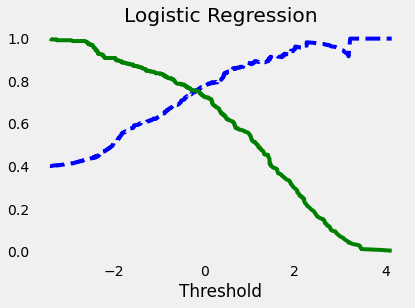

In [159]:
plot_precision_recall_vs_threshold(log_precisions, log_recalls, log_thresholds)
plt.title('Logistic Regression')
plt.grid()
plt.xlabel('Threshold')
plt.show()

Text(0.5, 1.0, 'Stochastic Gradient Descent')

Text(0.5, 0, 'Threshold')

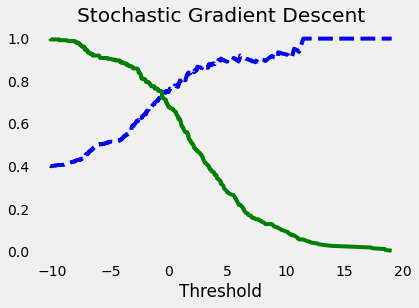

In [160]:
plot_precision_recall_vs_threshold(sgd_precisions, sgd_recalls, sgd_thresholds)
plt.title('Stochastic Gradient Descent')
plt.grid()
plt.xlabel('Threshold')
plt.show()

Text(0.5, 1.0, 'Linear Discriminant Analysis')

Text(0.5, 0, 'Threshold')

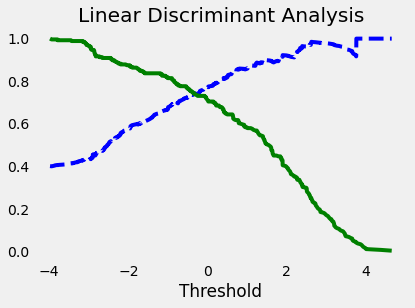

In [161]:
plot_precision_recall_vs_threshold(lda_precisions, lda_recalls, lda_thresholds)
plt.title('Linear Discriminant Analysis')
plt.grid()
plt.xlabel('Threshold')
plt.show()

Text(0.5, 1.0, 'Logistic Regression')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

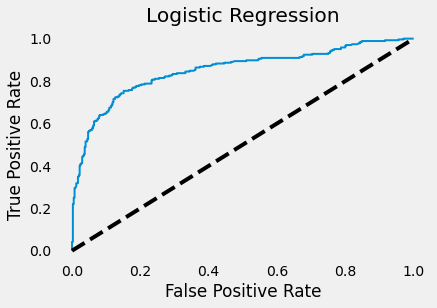

In [162]:
log_fpr, log_tpr, log_thresholds = roc_curve(y_train, y_scores_logreg)
plot_roc_curve(log_fpr, log_tpr, log_thresholds)
plt.title('Logistic Regression')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


Text(0.5, 1.0, 'Stochastic Gradient Descent')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

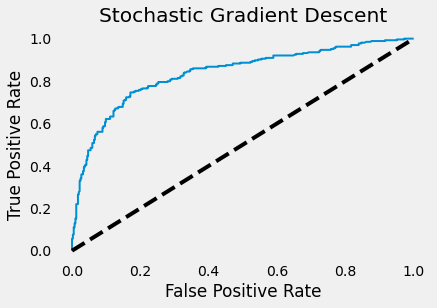

In [163]:
sgd_fpr, sgd_tpr, sgd_thresholds = roc_curve(y_train, y_scores_sgd)
plot_roc_curve(sgd_fpr, sgd_tpr, sgd_thresholds)
plt.title('Stochastic Gradient Descent')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


Text(0.5, 1.0, 'Linear Discriminant Analysis')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

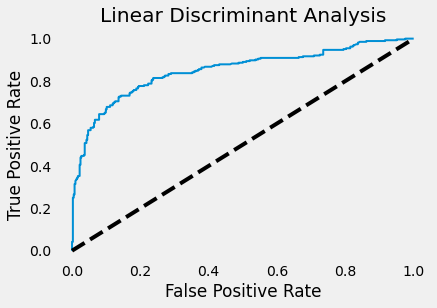

In [164]:
lda_fpr, lda_tpr, lda_thresholds = roc_curve(y_train, y_scores_lda)
plot_roc_curve(lda_fpr, lda_tpr, lda_thresholds)
plt.title('Linear Discriminant Analysis')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


# Ensemble Models

# Random Forest

In [165]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
y_pred_rnd = rnd_clf.predict(X_test)

cv_scores_rnd = cross_val_score(rnd_clf, X_train, y_train, cv = 5, scoring = "accuracy")

RandomForestClassifier()

In [166]:
# randomized search
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators': [10, 50, 100, 500, 1000], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 50, 100, None], 'criterion': ['gini', 'entropy']}
rnd_random = RandomizedSearchCV(estimator = rnd_clf, param_distributions = random_grid, n_iter = 100, cv = 3)

rnd_random.fit(X_train, y_train)
rnd_random.best_params_

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000]})

{'n_estimators': 50,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'entropy'}

In [167]:
# create variables
random_n_estimators = rnd_random.best_params_['n_estimators']
random_max_features = rnd_random.best_params_['max_features']
random_max_depth = rnd_random.best_params_['max_depth']
random_criterion = rnd_random.best_params_['criterion']

In [168]:
# tune hyperparameters
from sklearn.model_selection import GridSearchCV

#create variables for search
n_estimators = [random_n_estimators - 10, random_n_estimators, random_n_estimators + 10]
max_features = [random_max_features]
max_depth = [random_max_depth - 1, random_max_depth, random_max_depth + 1]
criterion = ['gini']

# grid parameters
parametersGrid = {"n_estimators": n_estimators, "max_features": max_features, "max_depth": max_depth, "criterion": criterion}
grid = GridSearchCV(rnd_clf, parametersGrid, scoring = 'r2', cv = 5)
rnd_tuning_results = grid.fit(X_train, y_train)

rnd_tuning_results.best_params_
rnd_tuning_results.best_score_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 50}

0.2484420075615045

In [169]:
rnd_clf_tuned = RandomForestClassifier(max_depth = rnd_tuning_results.best_params_['max_depth'], max_features = rnd_tuning_results.best_params_['max_features'], n_estimators = rnd_tuning_results.best_params_['n_estimators'])
rnd_clf_tuned.fit(X_train, y_train)
cv_scores_rnd_tuned = cross_val_score(rnd_clf_tuned, X_train, y_train, cv = 5, scoring = "accuracy")

RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=50)

# Gradient Boosted Classifier

In [170]:
# gradient boost
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

cv_scores_gb = cross_val_score(gb_clf, X_train, y_train, cv = 5, scoring = "accuracy")
cv_scores_gb

GradientBoostingClassifier()

array([0.85074627, 0.79850746, 0.81343284, 0.85714286, 0.82706767])

In [171]:
# Randomized Search

random_grid = {'n_estimators': [10, 50, 100, 500, 1000], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 50, 100, None], 'learning_rate': [0.05, 0.1, 0.2]}
gb_random = RandomizedSearchCV(estimator = gb_clf, param_distributions = random_grid, n_iter = 100, cv = 3)

gb_random.fit(X_train, y_train)
gb_random.best_params_

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [5, 10, 50, 100, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000]})

{'n_estimators': 50,
 'max_features': 'sqrt',
 'max_depth': 5,
 'learning_rate': 0.05}

In [172]:
# grid search

#create variables for search
n_estimators = [gb_random.best_params_['n_estimators'] - 10, gb_random.best_params_['n_estimators'], gb_random.best_params_['n_estimators'] + 10]
max_features = [gb_random.best_params_['max_features']]
max_depth = [gb_random.best_params_['max_depth'] - 1, gb_random.best_params_['max_depth'], gb_random.best_params_['max_depth'] + 6]
learning_rate = [gb_random.best_params_['learning_rate']]

# grid parameters
parametersGrid = {"n_estimators": n_estimators, "max_features": max_features, "max_depth": max_depth, "learning_rate": learning_rate}
grid = GridSearchCV(gb_clf, parametersGrid, scoring = 'r2', cv = 5)
gb_tuning_results = grid.fit(X_train, y_train)

gb_tuning_results.best_params_
gb_tuning_results.best_score_

gb_clf_tuned = GradientBoostingClassifier(learning_rate = gb_tuning_results.best_params_['learning_rate'], max_depth = gb_tuning_results.best_params_['max_depth'], max_features = gb_tuning_results.best_params_['max_features'], n_estimators = gb_tuning_results.best_params_['n_estimators'])
gb_clf_tuned.fit(X_train, y_train)

cv_scores_gb_tuned = cross_val_score(gb_clf_tuned, X_train, y_train, cv = 5, scoring = "accuracy")

{'learning_rate': 0.05,
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 40}

0.26715014603379394

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           n_estimators=40)

# Extra Tree Classifier

In [173]:
# extra trees
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier()
ext_clf.fit(X_train, y_train)
y_pred_ext = ext_clf.predict(X_test)

cv_scores_ext = cross_val_score(ext_clf, X_train, y_train, cv = 5, scoring = "accuracy")

ExtraTreesClassifier()

In [174]:
# Randomized Search

random_grid = {'n_estimators': [10, 50, 100, 500, 1000], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 50, 100, None], 'criterion': ['gini', 'entropy']}
ext_random = RandomizedSearchCV(estimator = ext_clf, param_distributions = random_grid, n_iter = 100, cv = 3)

ext_random.fit(X_train, y_train)
ext_random.best_params_

RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 50, 100, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000]})

{'n_estimators': 10,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini'}

In [175]:
# grid search

#create variables for search
n_estimators = [ext_random.best_params_['n_estimators'] - 10, ext_random.best_params_['n_estimators'], ext_random.best_params_['n_estimators'] + 10]
max_features = [ext_random.best_params_['max_features']]
max_depth = [ext_random.best_params_['max_depth'] - 1, ext_random.best_params_['max_depth'], ext_random.best_params_['max_depth'] + 6]
criterion = [ext_random.best_params_['criterion']]

# grid parameters
parametersGrid = {"n_estimators": n_estimators, "max_features": max_features, "max_depth": max_depth, "criterion": criterion}
grid = GridSearchCV(ext_clf, parametersGrid, scoring = 'r2', cv = 5)
ext_tuning_results = grid.fit(X_train, y_train)

ext_tuning_results.best_params_
ext_tuning_results.best_score_

ext_clf_tuned = ExtraTreesClassifier(criterion = ext_tuning_results.best_params_['criterion'], max_depth = ext_tuning_results.best_params_['max_depth'], max_features = ext_tuning_results.best_params_['max_features'], n_estimators = ext_tuning_results.best_params_['n_estimators'])
ext_clf_tuned.fit(X_train, y_train)

cv_scores_ext_tuned = cross_val_score(ext_clf_tuned, X_train, y_train, cv = 5, scoring = "accuracy")

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 10}

0.22334766793886301

ExtraTreesClassifier(max_depth=5, max_features='sqrt', n_estimators=10)

# Compare Untuned vs Tuned

In [176]:
# tuned better than untuned
print('Random Forest CV score:', np.mean(cross_val_score(rnd_clf, X_train, y_train, cv = 5, scoring = "accuracy")))
print('Tuned RF score:', np.mean(cv_scores_rnd_tuned))

print('\nGradient Boosted CV score:', np.mean(cross_val_score(gb_clf, X_train, y_train, cv = 5, scoring = "accuracy")))
print('Tuned GB score:', np.mean(cv_scores_gb_tuned))

print('\nExtra Tree CV score:', np.mean(cross_val_score(ext_clf, X_train, y_train, cv = 5, scoring = "accuracy")))
print('Tuned EXT score:', np.mean(cv_scores_ext_tuned))

Random Forest CV score: 0.8038828414319381
Tuned RF score: 0.8203568623050164

Gradient Boosted CV score: 0.8293794186959937
Tuned GB score: 0.8188979912467736

Extra Tree CV score: 0.7784760408483896
Tuned EXT score: 0.8173942318482774


# Variable Importance by Method

<BarContainer object of 12 artists>

([<matplotlib.axis.XTick at 0x291db0d7f70>,
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Fare'),
  Text(2, 0, 'Parch'),
  Text(3, 0, 'SibSp'),
  Text(4, 0, 'Sex_female'),
  Text(5, 0, 'Sex_male'),
  Text(6, 0, 'Embarked_C'),
  Text(7, 0, 'Embarked_Q'),
  Text(8, 0, 'Embarked_S'),
  Text(9, 0, 'Pclass_1'),
  Text(10, 0, 'Pclass_2'),
  Text(11, 0, 'Pclass_3')])

Text(0, 0.5, 'Importance')

Text(0.5, 0, 'Variable')

Text(0.5, 1.0, 'Variable Importances')

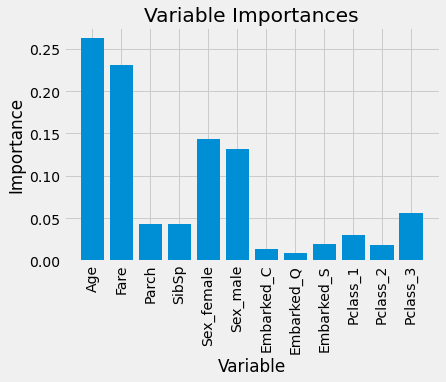

In [177]:
importances = list(rnd_clf.feature_importances_)

#set the style
plt.style.use('fivethirtyeight')

#list of x locations for plotting 
x_values = list(range(len(importances)))

#make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

#Tick labels for x axis
columns = X_train.columns
plt.xticks(x_values, columns, rotation = 'vertical')

#axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

# Test Highest Accuracy Model

In [178]:
# 
from sklearn.metrics import accuracy_score
test_predictions = [cv_scores_lr, cv_scores_sgd, cv_scores_lda, cv_scores_knn, cv_scores_rnd, cv_scores_gb, cv_scores_ext]
models = ['LR', 'SGD', 'LDA', 'KNN', 'RF', 'GB', 'EXT']
best_score = cv_scores_lr
best_model = models[0]
for model, scores in zip(models, test_predictions):
    if np.mean(scores) > np.mean(best_score):
        best_score = scores
        best_model = model

print('The best classifier model is:', best_model)
print('with a CV average score of:', np.mean(best_score))

The best classifier model is: GB
with a CV average score of: 0.8293794186959937


# Apply models to test.csv and export

In [179]:
# import test.csv

TestData = pd.read_csv('test.csv')

In [180]:
# fix null values
TestData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [181]:
TestData['Age'] = TestData['Age'].fillna(TestData['Age'].median())
TestData['Fare'] = TestData['Fare'].fillna(TestData['Fare'].median())
TestData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [182]:
# seperate numerical and categorical columns

num_cols = list(set(TestData._get_numeric_data().columns) - set(target_cols))
cat_cols = list(set(TestData.columns) - set(num_cols) - set(target_cols))

num_features = TestData[num_cols]
cat_features = TestData[cat_cols]

In [183]:
# looking at histogram, some numerical variables should be treated as categorical
num_to_cat = ['Pclass']

cat_features['Pclass'] = TestData[num_to_cat]
num_features.drop(num_to_cat, axis=1, inplace=True)

# num_features.shape
# cat_features.shape

In [184]:
# drop variables not helpful
# categorical
cat_cols_to_drop = ['Ticket','Name','Cabin']
cat_features.drop(cat_cols_to_drop, axis=1, inplace=True)
cat_features.head()

# numerical
num_cols_to_drop = ['PassengerId']
num_features.drop(num_cols_to_drop, axis=1, inplace=True)
num_features.head()

,Embarked,Sex,Pclass
0,Q,male,3
1,S,female,3
2,Q,male,2
3,S,male,3
4,S,female,3


,Age,Fare,Parch,SibSp
0,34.5,7.8292,0,0
1,47.0,7.0000,0,1
2,62.0,9.6875,0,0
3,27.0,8.6625,0,0
4,22.0,12.2875,1,1


In [185]:
# one-hot encoding for cat variables
cat_OH = cat_features[['Sex', 'Embarked', 'Pclass']]
cat_features_OH = pd.get_dummies(data=cat_OH, columns = ['Sex', 'Embarked', 'Pclass'], prefix = ['Sex', 'Embarked', 'Pclass'])

In [186]:
# prep numerical features
normalized = transformer.fit_transform(num_features.loc[:,num_features.columns])
norm_num_df = pd.DataFrame(normalized, columns=num_features.columns)

In [187]:
# merge all data

test_df = norm_num_df.merge(cat_features_OH, how = 'outer', left_index = True, right_index = True)
print("Shape of numerical:", norm_num_df.shape)
print("Shape of categorical:", cat_features_OH.shape)
print("Shape of merged df:", model_df.shape)

test_df.head()

Shape of numerical: (418, 4)
Shape of categorical: (418, 8)
Shape of merged df: (891, 12)


,Age,Fare,Parch,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.386231,-0.497413,-0.400248,-0.499470,0,1,0,1,0,0,0,1
1,1.371370,-0.512278,-0.400248,0.616992,1,0,0,0,1,0,0,1
2,2.553537,-0.464100,-0.400248,-0.499470,0,1,0,1,0,0,1,0
3,-0.204852,-0.482475,-0.400248,-0.499470,0,1,0,0,1,0,0,1
4,-0.598908,-0.417492,0.619896,0.616992,1,0,0,0,1,0,0,1


In [188]:
# apply classification models
logreg_clf.fit(model_df_drop, target_var)
sgd_clf.fit(model_df_drop, target_var)
lda_clf.fit(model_df_drop, target_var)
knn_clf.fit(model_df_drop, target_var)

logreg_results = logreg_clf.predict(test_df)
sgd_results = sgd_clf.predict(test_df)
lda_results = lda_clf.predict(test_df)
knn_results = knn_clf.predict(test_df)

# apply ensemble methods
rnd_clf_tuned.fit(model_df_drop, target_var)
gb_clf_tuned.fit(model_df_drop, target_var)
ext_clf_tuned.fit(model_df_drop, target_var)

rnd_results = rnd_clf_tuned.predict(test_df)
gb_results = gb_clf_tuned.predict(test_df)
ext_results = ext_clf_tuned.predict(test_df)

LogisticRegression(C=10000)

SGDClassifier()

LinearDiscriminantAnalysis()

KNeighborsClassifier(n_neighbors=10)

RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=50)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           n_estimators=40)

ExtraTreesClassifier(max_depth=5, max_features='sqrt', n_estimators=10)

In [189]:
# classification models
output_results_logreg = {'PassengerId':TestData.PassengerId, 'Survived':logreg_results}
output_results_sgd = {'PassengerId':TestData.PassengerId, 'Survived':sgd_results}
output_results_lda = {'PassengerId':TestData.PassengerId, 'Survived':lda_results}
output_results_knn = {'PassengerId':TestData.PassengerId, 'Survived':knn_results}

output_results_logreg = pd.DataFrame(data = output_results_logreg)
output_results_sgd = pd.DataFrame(data = output_results_sgd)
output_results_lda = pd.DataFrame(data = output_results_lda)
output_results_knn= pd.DataFrame(data = output_results_knn)

output_results_logreg.to_csv('logreg_output.csv', index=False)
output_results_sgd.to_csv('sgd_output.csv', index=False)
output_results_lda.to_csv('lda_output.csv', index=False)
output_results_knn.to_csv('knn_output.csv', index=False)

# ensemble methods
output_results_rnd = {'PassengerId': TestData.PassengerId, 'Survived': rnd_results}
output_results_gb = {'PassengerId': TestData.PassengerId, 'Survived': gb_results}
output_results_ext = {'PassengerId': TestData.PassengerId, 'Survived': ext_results}

output_results_rnd = pd.DataFrame(data = output_results_rnd)
output_results_gb = pd.DataFrame(data = output_results_gb)
output_results_ext = pd.DataFrame(data = output_results_ext)

output_results_rnd.to_csv('rnd_output.csv', index=False)
output_results_gb.to_csv('gb_output.csv', index=False)
output_results_ext.to_csv('ext_output.csv', index=False)